### Результаты восстановления модельных профилей

$$\pmb\xi = M \pmb n,$$
$$M: V \rightarrow W; \, 
M(\pmb n_1 + \pmb n_2) = M(\pmb n_1) + M(\pmb n_2), \,
M(c \pmb n) = c M(\pmb n),$$
$$\dim V = d_1, \, \dim W = d_2.$$

$$||\pmb \xi|| = \max_{i=1, \ldots, d_2} |\xi_i|$$

Пусть линейный оператор задан матрицей $||m^p_k||^{d_2}_{d_1}$, 
строки которой обозначим $m_i, \, i = \overline{1, d_2}$. $\pmb \xi$ соотвествует
$||\xi^p||^{d_2}$, $\pmb n$ соотвествует $||n^p||^{d_1}$.
Тогда:

$$\xi_i = (m_i^T, \pmb n), \quad i = \overline{1, d_2}$$

Рассмотрим задачу на минимакс

$$\min_{\pmb n}\max_{i=\overline{1, d_2}} |\xi_i - (m_i^T, \pmb n)|$$

$$|d| = \min_{z} \{ z \, | \, z \geq d \wedge z \geq -d\}$$

Соответственно:

$$\max_{i=\overline{1, d_2}} |\xi_i - (m_i^T, \pmb n)| = 
\min_{z} \{z \,| \, z \geq \xi_i - (m_i^T, \pmb n) \wedge z \geq -\xi_i + (m_i^T, \pmb n)\}
, \quad i = \overline{1, d_2}$$

Введём два вектора $s = (z, n_1, \ldots, n_{d_1})$ и $t = (1, 0, \ldots, 0)$. 
Их скалярное произведение$(s, t) = z$.

Минимизация по $s$ при наложенных ограничениях даст решение искомой задачи:

$$\min_s \{(s, t) \, | \,  z \geq \xi_i - (m_i^T, \pmb n) \wedge z \geq -\xi_i + (m_i^T, \pmb n)\}
, \, i = \overline{1, d_2} \}\, \Longrightarrow \, s$$ 

$+$ наличие априорной информации(унимодальность профиля и неотрицательность концентраций)

$$\exists k \in {1, \ldots, d_1}:
\begin{cases}
n_1 \leq n_2, \\
\ldots \\
n_{k-1} \leq n_{k}, \\
n_{k} \geq n_{k+1}, \\
\ldots \\
n_{d_1 - 1} \geq n_{d_1}.
\end{cases}
\qquad and \qquad \forall i \;  (n_i \geq 0).$$

In [9]:
import sys
import csv
import matplotlib.pyplot as plt
from pathlib import Path
sys.path.insert(1, '../scripts')

from profile_recovery import ProfileRecovery

In [10]:
dict_profile_time = {("06", "42"): "PM004A",
                     ("07", "05"): "PM004D",
                     ("07", "37"): "PM005A",
                     ("08", "08"): "PM005D",
                     ("09", "42"): "PM006A",
                     ("10", "13"): "PM006D",
                     ("11", "01"): "PM007A",
                     ("11", "27"): "PM007D",
                     ("13", "06"): "PM008A",
                     ("13", "23"): "PM008D",
                     ("16", "54"): "PM010A",
                     ("17", "17"): "PM010D",
                     ("17", "46"): "PM011A",
                     ("18", "04"): "PM011D"}

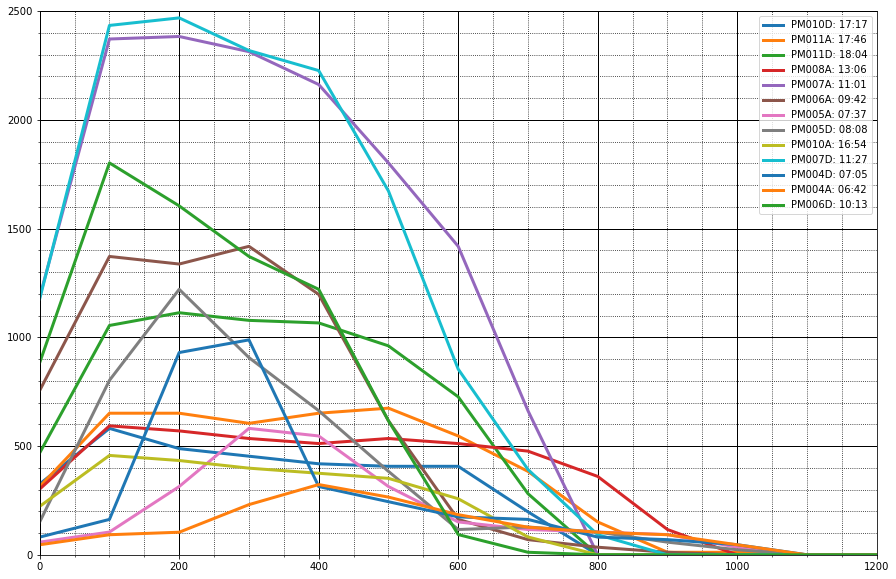

In [12]:
plt.figure(figsize=(15, 10))
for txt_path in Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"):
    #plt.title(txt_path.name.replace(".csv", "").replace("_", " "))
    prof_recovery_obj = ProfileRecovery(txt_path.name)
    prof_recovery = prof_recovery_obj.linear_programming()
    #plt.figure(figsize=(8, 6))
    plt.minorticks_on()
    plt.grid(which='major', color = 'k', linewidth = 1)
    plt.grid(which='minor', color = 'k', linestyle = ':')
    plt.ylim(0, 2500)
    plt.xlim(0, 1200)
    list_text = txt_path.name.replace(".csv", "").split("_")
    plt.plot(prof_recovery[0], prof_recovery[1], linewidth=3, 
             label=f"{dict_profile_time.get(tuple(list_text[1:]))}: {list_text[1]}:{list_text[2]}")
plt.legend()
plt.show()